In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import warnings

In [35]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

In [36]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.5f}".format(inp.mean()),
    )
    return plt.figure

In [37]:
df = pd.read_csv('post_grouping_data.csv')
df

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Group,Quartile,Return,mean_return_company
0,01-01-2020,20MICRONS,35.20,36.00,36.80,35.25,35.65,35.80,35.96,N,4.0,0.000000,0.041379
1,02-01-2020,20MICRONS,35.80,36.00,36.20,35.10,35.80,35.55,35.51,N,4.0,-1.251390,0.041379
2,03-01-2020,20MICRONS,35.55,35.85,35.85,34.95,35.20,35.05,35.32,N,4.0,-0.535061,0.041379
3,06-01-2020,20MICRONS,35.05,35.50,35.50,32.20,34.10,32.80,33.33,N,4.0,-5.634202,0.041379
4,07-01-2020,20MICRONS,32.80,32.35,34.80,32.35,33.30,33.20,33.73,N,4.0,1.200120,0.041379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58346,24-06-2020,SHRENIK,31.65,33.20,33.20,32.00,33.20,33.20,33.08,N,1.0,4.518167,0.034439
58347,25-06-2020,SHRENIK,33.20,34.85,34.85,33.15,34.85,34.85,34.84,N,1.0,5.320435,0.034439
58348,26-06-2020,SHRENIK,34.85,36.55,36.55,36.30,36.55,36.55,36.52,N,1.0,4.822044,0.034439
58349,29-06-2020,SHRENIK,36.55,38.35,38.35,37.25,38.35,38.35,38.27,N,1.0,4.791895,0.034439


In [38]:
#Make different df for different quartiles
df_q1 = df.query('Quartile == 1.0')
df_q2 = df.query('Quartile == 2.0')
df_q3 = df.query('Quartile == 3.0')
df_q4 = df.query('Quartile == 4.0')

In [39]:
#df for Grouped = Yes
df_q1_Y = df_q1.query('Group == "Y"')
df_q2_Y = df_q2.query('Group == "Y"')
df_q3_Y = df_q3.query('Group == "Y"')
df_q4_Y = df_q4.query('Group == "Y"')

In [40]:
#df for Grouped = No, or stand-alone companies
df_q1_N = df_q1.query('Group == "N"')
df_q2_N = df_q2.query('Group == "N"')
df_q3_N = df_q3.query('Group == "N"')
df_q4_N = df_q4.query('Group == "N"')

## Analysing for quartile 1

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

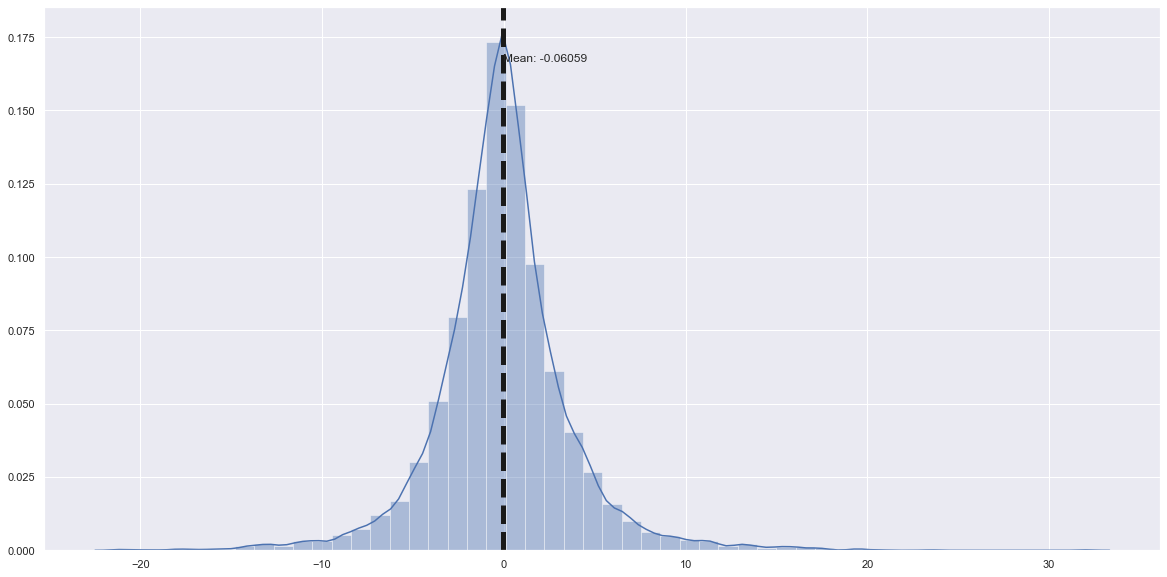

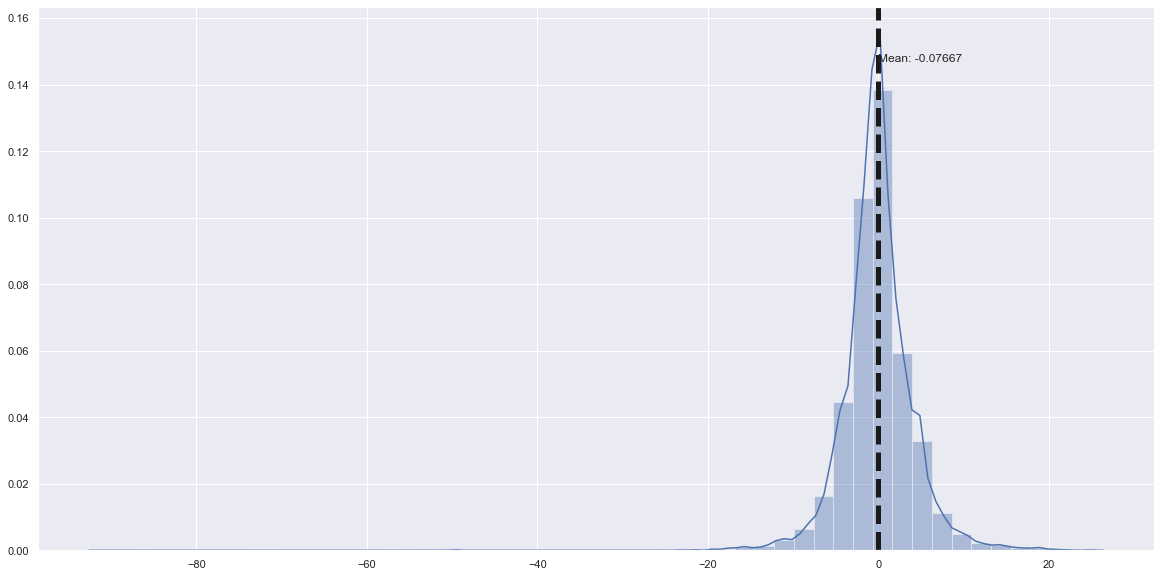

In [41]:
col1 = np.array(df_q1_Y['Return'])
col2 = np.array(df_q1_N['Return'])

plot_distribution(col1)
plot_distribution(col2)

In [42]:
stat, p = ttest_ind(col1, col2)
print('t value = %.3f, p = %.3f' % (stat, p))

t value = 0.239, p = 0.811


## Analysing for quartile 2

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

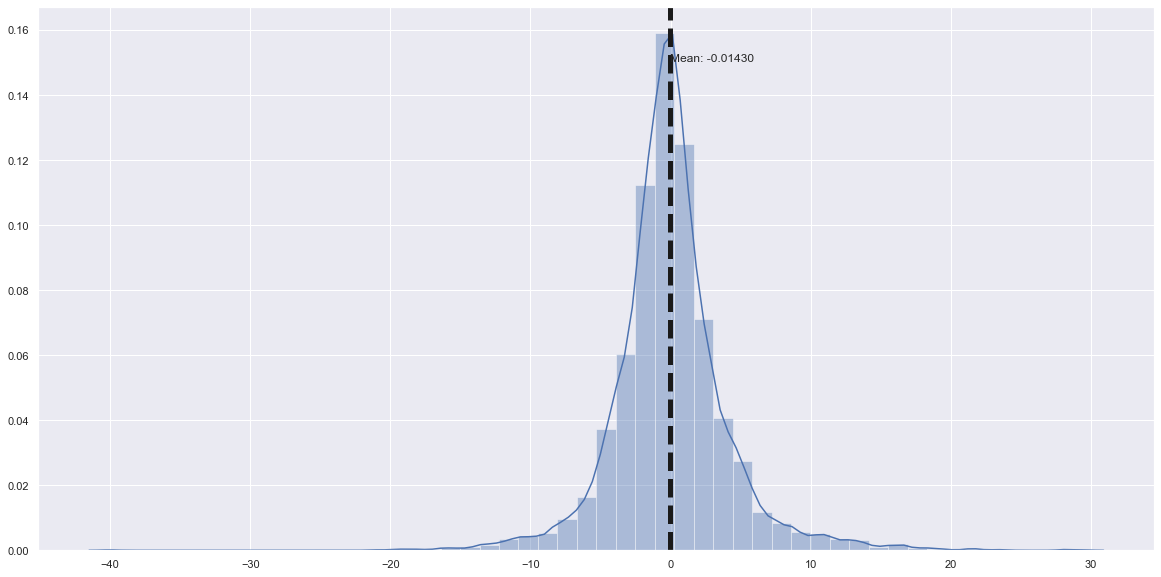

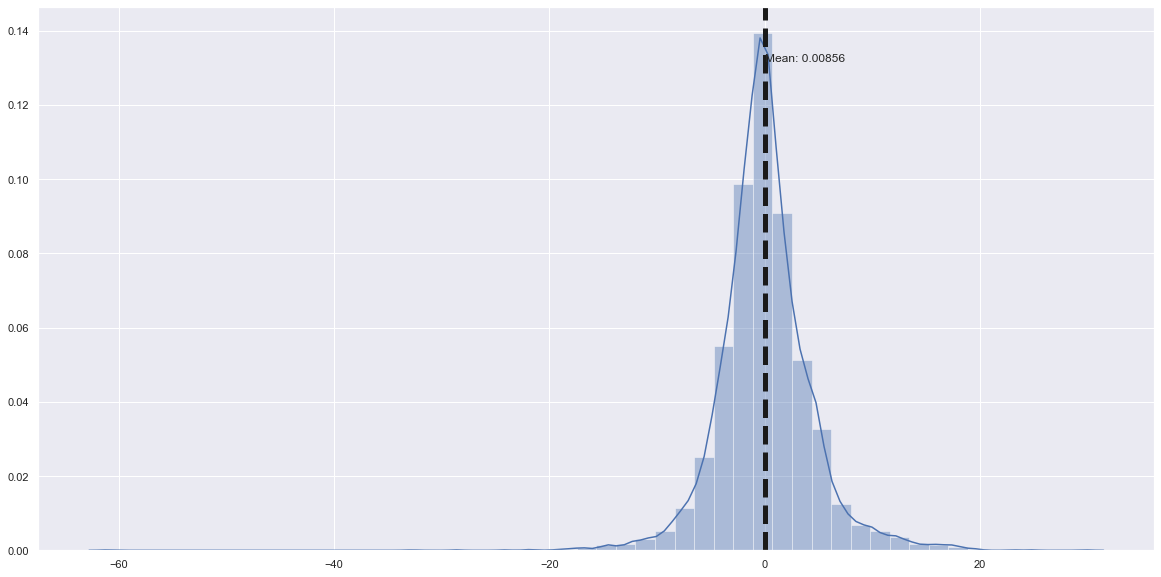

In [43]:
col1 = np.array(df_q2_Y['Return'])
col2 = np.array(df_q2_N['Return'])

plot_distribution(col1)
plot_distribution(col2)

In [44]:
stat, p = ttest_ind(col1, col2)
print('t value = %.3f, p = %.3f' % (stat, p))

t value = -0.322, p = 0.748


## Analysing for quartile 3

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

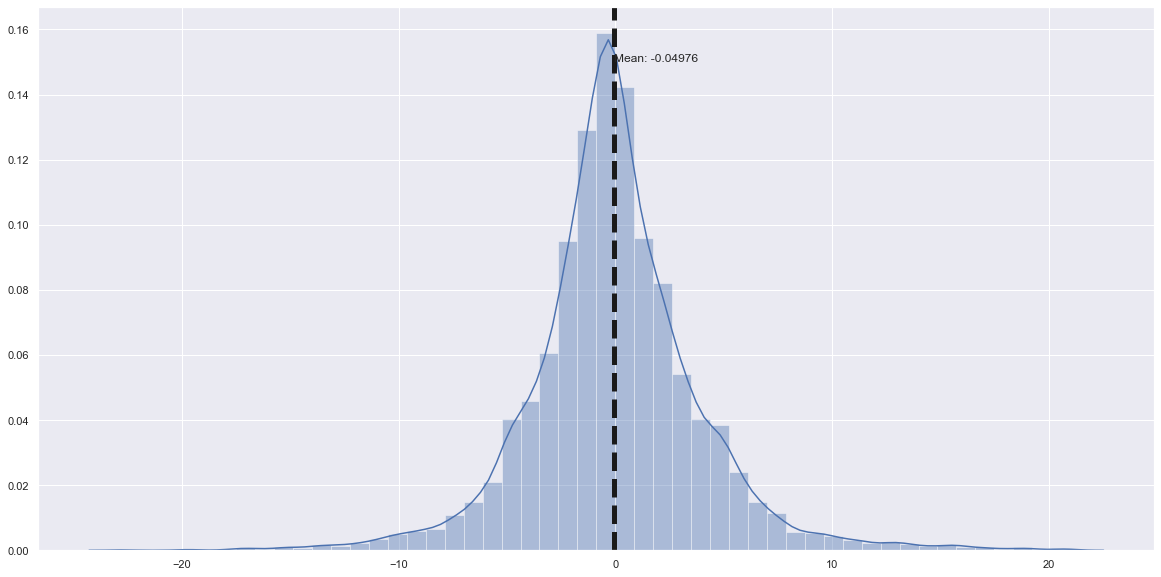

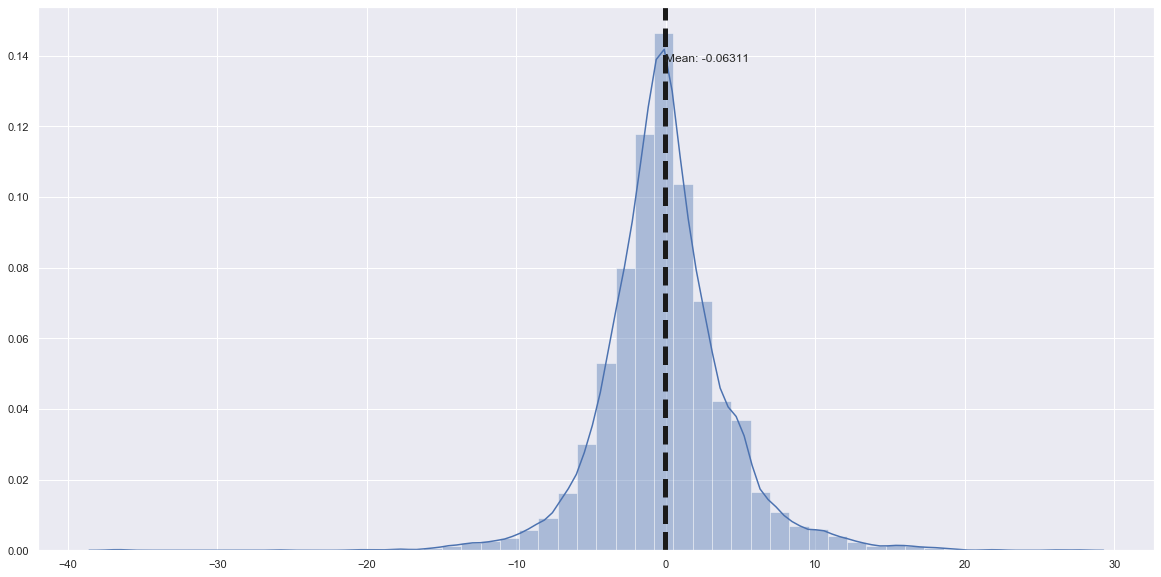

In [45]:
col1 = np.array(df_q3_Y['Return'])
col2 = np.array(df_q3_N['Return'])

plot_distribution(col1)
plot_distribution(col2)

In [46]:
stat, p = ttest_ind(col1, col2)
print('t value = %.3f, p = %.3f' % (stat, p))

t value = 0.197, p = 0.844


## Analysing for quartile 4

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

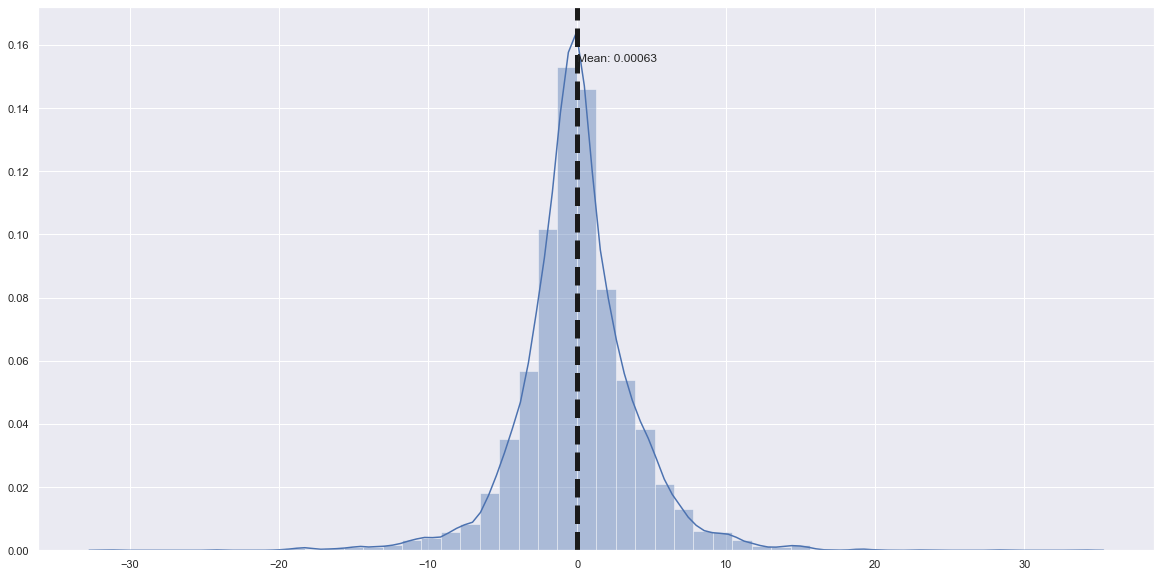

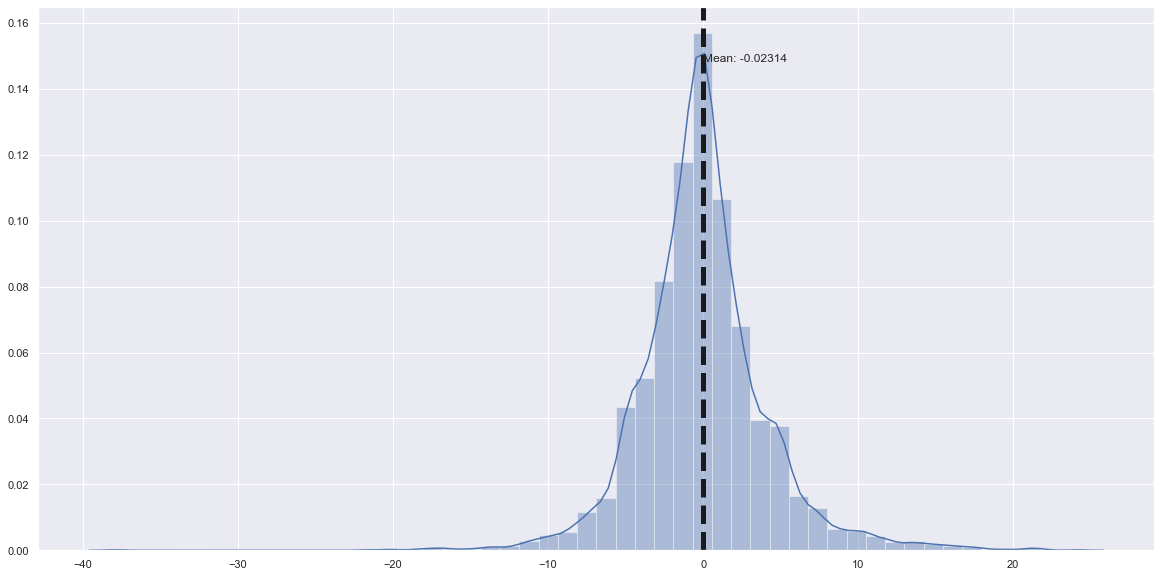

In [47]:
col1 = np.array(df_q4_Y['Return'])
col2 = np.array(df_q4_N['Return'])

plot_distribution(col1)
plot_distribution(col2)

In [48]:
stat, p = ttest_ind(col1, col2)
print('t value = %.3f, p = %.3f' % (stat, p))

t value = 0.342, p = 0.732
